In [29]:
library(readxl)
B1<-read_excel("C:/Users/HP/Downloads/hoiquy1.xlsx")

In [30]:
str(B1)

tibble [20 × 3] (S3: tbl_df/tbl/data.frame)
 $ id          : num [1:20] 1 2 3 4 5 6 7 8 9 10 ...
 $ Plan_density: num [1:20] 137 107 132 135 115 103 102 65 149 85 ...
 $ Cob_weight  : num [1:20] 212 241 215 225 250 241 237 282 206 246 ...


In [31]:
attach(B1)
library(pastecs)
stat.desc(x=B1, basic = T, desc = T, norm = T, p = 0.95)

The following objects are masked from B1 (pos = 6):

    Cob_weight, id, Plan_density




,id,Plan_density,Cob_weight
,<dbl>,<dbl>,<dbl>
nbr.val,20.0000000,20.0000000,20.0000000
nbr.null,0.0000000,0.0000000,0.0000000
nbr.na,0.0000000,0.0000000,0.0000000
min,1.0000000,65.0000000,190.0000000
max,20.0000000,184.0000000,282.0000000
range,19.0000000,119.0000000,92.0000000
sum,210.0000000,2561.0000000,4482.0000000
median,10.5000000,128.0000000,224.0000000
mean,10.5000000,128.0500000,224.1000000


Giá trị trung bình (mean) của biến Plan density = 128.05, độ lệch chuẩn (std.dev) = 32.61, p-value = 0.926 > 0.05 -> dữ liệu theo phân phối chuẩn 
Giá trị trung bình (mean) của biến Cob weight = 224.10, độ lệch chuẩn (std.dev) = 24.95, p-value =0.367>0.05-> dữ liệu theo phân phối chuẩn

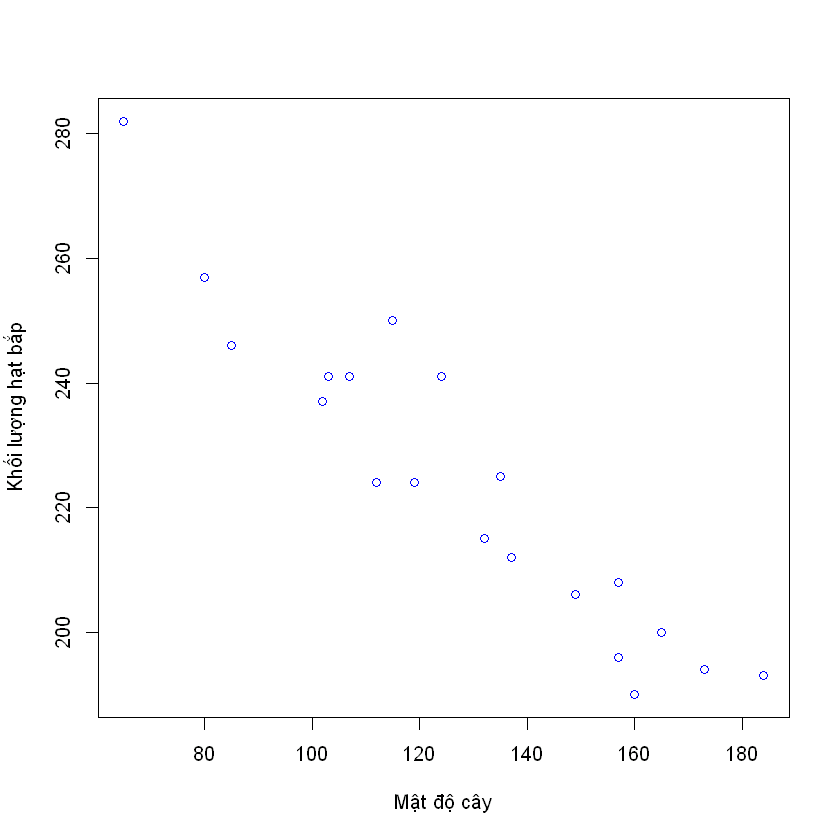

In [48]:
plot(Cob_weight~Plan_density, data = B1, col ="blue", xlab = "Mật độ cây",ylab ="Khối lượng hạt bắp")

In [49]:
cor.test(Plan_density, Cob_weight, method="pearson", data="B1")


	Pearson's product-moment correlation

data:  Plan_density and Cob_weight
t = -11.885, df = 18, p-value = 5.889e-10
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9770972 -0.8560421
sample estimates:
       cor 
-0.9417954 


**r = -0.94 -> 2 biến này có tương quan tuyến tính nghịch và p-value = 5.889e-10 < 0.001 -> hệ số tương quan có ý nghĩa thống kê**

In [34]:
lmchol<-lm(Cob_weight~Plan_density, data = B1)
#Kết quả mô hình hồi quy tuyến tính 
summary(lmchol)


Call:
lm(formula = Cob_weight ~ Plan_density, data = B1)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.666  -6.346  -1.439   5.049  16.496 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  316.37619    7.99950   39.55  < 2e-16 ***
Plan_density  -0.72063    0.06063  -11.88 5.89e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.619 on 18 degrees of freedom
Multiple R-squared:  0.887,	Adjusted R-squared:  0.8807 
F-statistic: 141.3 on 1 and 18 DF,  p-value: 5.889e-10


Kết quả mô hình hồi quy: R² = 0.887, F(1,18) = 11.3, p-value mô hình = 5.889 × 10⁻¹⁰, α = 0.001  
Hệ số hồi quy: Intercept = 316.37619, p-value < 2 × 10⁻¹⁶, Slope (Plant density) = −0.72063, p-value = 5.89 × 10⁻¹⁰

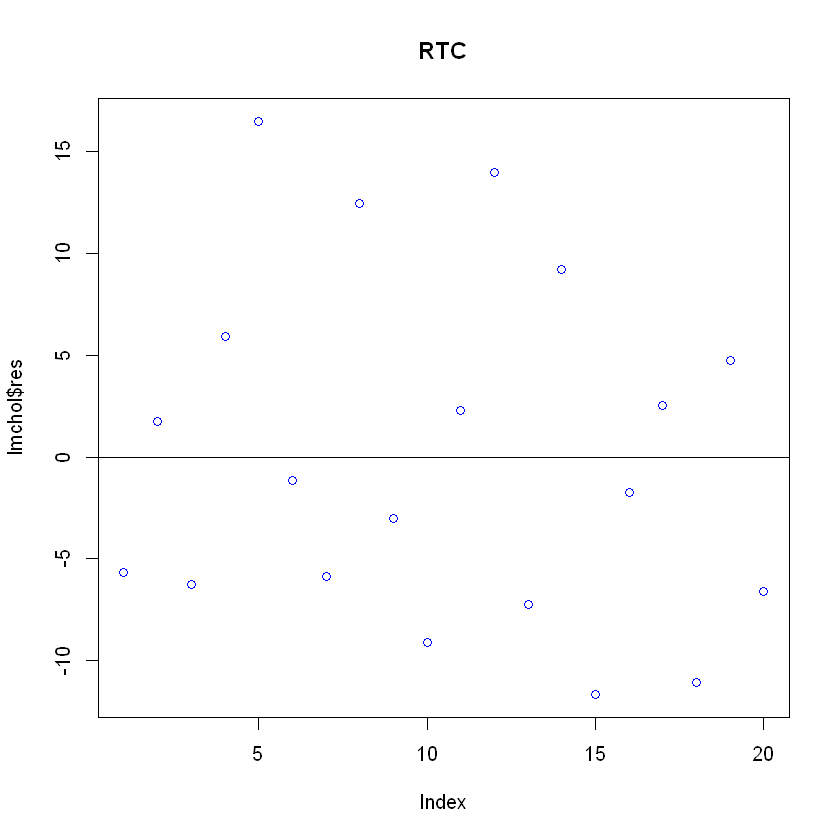

In [35]:
par(ask = T)
plot(lmchol$res, ,main ="RTC",col ="blue")
abline(h=0)

Phần dư phân bố ngẫu nhiên quanh đường 0, nên giả định độc lập phần dư được thoả mãn.

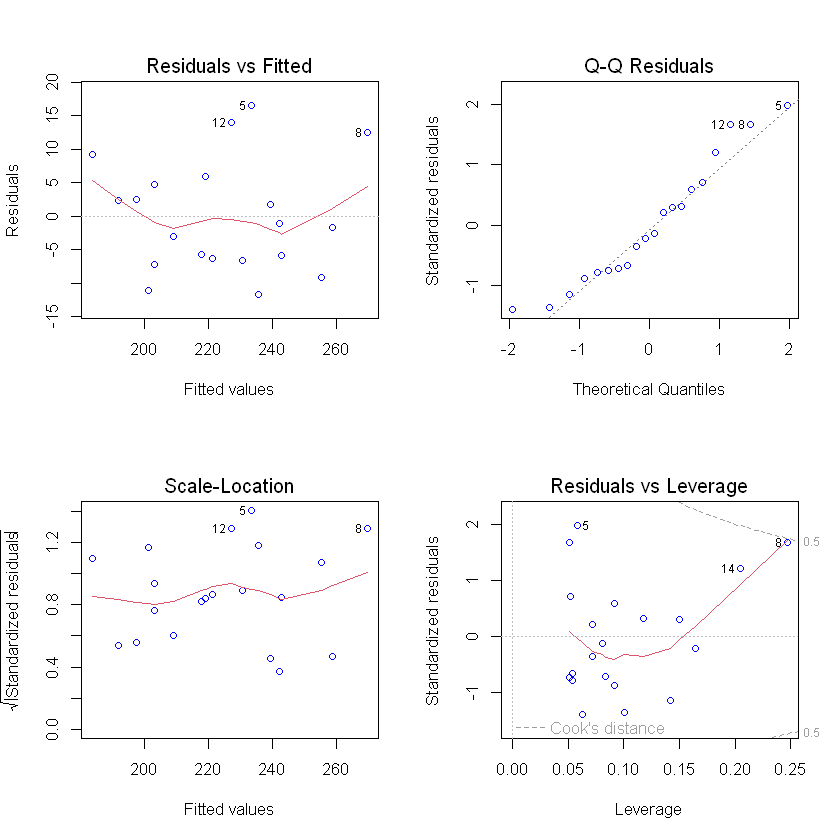

In [36]:
par(mfrow=c(2,2))
plot(lmchol, which=c(1,2,3,5),col="blue")

Residuals vs Fitted: Các điểm phân bố ngẫu nhiên quanh đường 0, không tạo thành xu hướng rõ rệt 

Q-Q plot: Các điểm phần dư nằm gần đường thẳng kỳ vọng 

Scale-Location: Phân bố phương sai tương đối đồng đều,
Residuals vs Leverage: Không xuất hiện điểm có giá trị Cook’s distance vượt ngưỡng, và không có điểm outlier ảnh hưởng mạnh 

Đặt giả thuyết: 
+ H0: Giá trị các phần dư độc lập 
+ H1: Giá trị các phần dư không độc lập 




In [37]:
library(car)
dwt(lmchol, alternative="two.sided")

 lag Autocorrelation D-W Statistic p-value
   1      -0.3113733      2.566083   0.172
 Alternative hypothesis: rho != 0

Kết luận: P=value = 0.172 > alpha =0.05 => Chấp nhận giả thuyết H0, Giá trị các phần dư độc lập với nhau 

Đặt giả thuyết: 
+ H0: Phần dư có phương sai đồng nhất 
+ H1: Phần dư có phương sai không đồng nhất 

In [38]:
fligner.test(Cob_weight~Plan_density, data = B1)


	Fligner-Killeen test of homogeneity of variances

data:  Cob_weight by Plan_density
Fligner-Killeen:med chi-squared = 19, df = 18, p-value = 0.3918


 p-value=0.3918 > alpha=0,05 => Chấp nhận giả thuyết H0, phần dư có phương sai đồng nhất 

 

Đặt giả thuyết: 
+ H0:Phần dư của mô hình tuân theo phân phối chuẩn. 
+ H1: Phần dư của mô hình tuân theo phân phối chuẩn. 


In [39]:
stat.desc(x=resid(lmchol), basic = T, norm = T, desc = T, p=0.95)

nbr.val      nbr.null        nbr.na           min           max 
 2.000000e+01  0.000000e+00  0.000000e+00 -1.166605e+01  1.649583e+01 
        range           sum        median          mean       SE.mean 
 2.816188e+01 -8.881784e-15 -1.438890e+00 -4.440892e-16  1.875919e+00 
 CI.mean.0.95           var       std.dev      coef.var      skewness 
 3.926344e+00  7.038146e+01  8.389366e+00 -1.889117e+16  4.448286e-01 
     skew.2SE      kurtosis      kurt.2SE    normtest.W    normtest.p 
 4.343153e-01 -1.037514e+00 -5.227382e-01  9.451622e-01  2.995483e-01

Dựa vào giá trị normtest.p => P-value=0.299 > alpha = 0,05 => Chấp nhận H0, phần dư của mô hình tuân theo phân phối chuẩn. 


 Đặt giả thuyết: 
+ H0: Trung bình phần dư bằng không. 
+ H1: Trung bình phần dư khác không. 


In [40]:
t.test(resid(lmchol), mu = 0)


	One Sample t-test

data:  resid(lmchol)
t = -2.3673e-16, df = 19, p-value = 1
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -3.926344  3.926344
sample estimates:
    mean of x 
-4.440892e-16 


 P-value = 1 và t =  -2.3673e-16 (rất nhỏ t̀iệm cận về 0) => Chấp nhận giả thuyết H0. Vậy trung bình phần dư bằng 0. 

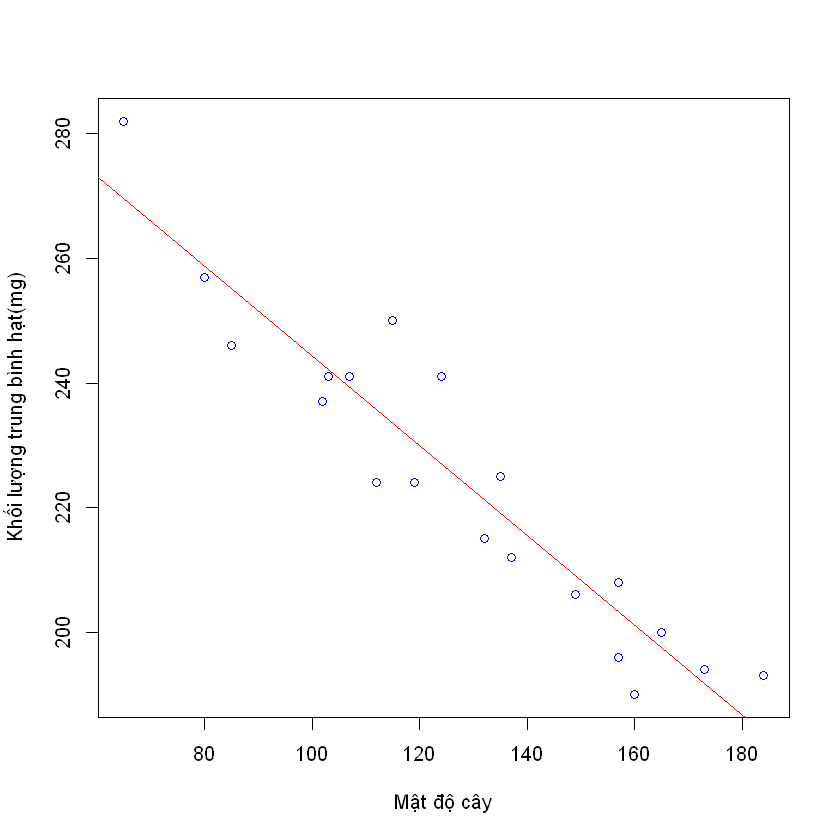

In [42]:
par(mfrow=c(1,1))
plot(Cob_weight~Plan_density, data=B1, col="blue",xlab="Mật độ cây",ylab="Khối lượng trung bình hạt(mg)")
abline(lmchol,col="red")

Kết quả phân tích hồi quy tuyến tính đơn biến cho thấy biến mối quan hệ giải thích được 88,7% sự thay đổi của biến phụ thuộc khối lượng hạt trên mỗi lõi bắp (R^2 = 0.887, F (1,18) =11.3, p-value = 5.889e-10 < alpha= 0.001 
Biến Plant density giải đoán được Cob weight [chặn intercept = 316.37619 , Pvalue < 2e-16 < alpha=0.001; độ dốc slope (Plant density) = -0.72063, p-value = 5.89e-10 < alpha= 0.001  
Phương trình hồi quy dùng để nội suy Cob weight theo Plant density (từ 65(min) đến 184(max)): Cob weight= 316.37619-0.72063* Plan density